Polynomial Regression

In [128]:
#Importing the necessary packages

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


%matplotlib inline

In [129]:
#Calculating the MSE error

def fcnCalculateMSE(YActual, YPredicted):
    sum_error = 0.0
    for i in range(len(YActual)):
        prediction_error = YActual[i] - YPredicted[i]
        sum_error += (prediction_error ** 2)
        mean_error = sum_error / float(len(YActual))
    return mean_error

In [174]:
#Make it work for multiple features
def fcnHigherOrderFeatures(x, n):
    x = x.reshape(-1,1)
    x = np.hstack((np.ones(x.shape[0]).reshape(-1,1), x))
    for i in range(2, n+1):
        x = np.hstack((x, (x[:,1]**i).reshape(-1,1)))
    return x

In [131]:
#Calculating the Weight Matrix using OLS Method

def fcnCalculateRegressionParameters(x, y):
    if len(x.shape) == 1:
        x = x[:,np.newaxis]
    if len(y.shape) == 1:
        y = y[:,np.newaxis]
#    x = fcnAddBias(x)
    weight = np.dot(np.dot(np.linalg.inv(np.dot(x.T,x)),x.T),y)
    
    return weight

In [132]:
#Calculating the Weight using Gradient Descent

def fcnCostFunctionMSE(x, y, b):
    m = len(x)
    j = (1/(2*m))*np.sum((y - np.dot(x,b))**2)
    
    return j

def fcnCalculateRegressionParametersUsingGradientDescent(x, y, intLR = 0.0001, intNumberOfIterations = 1000):
    if len(x.shape) == 1:
        x = x[:,np.newaxis]
    if len(y.shape) == 1:
        y = y[:,np.newaxis]
    x = fcnAddBias(x)
    b = np.zeros(x.shape[1]).reshape(-1,1)
    m = len(x)
    CostFunctionValue = np.zeros(intNumberOfIterations)
    for i in range(0,intNumberOfIterations):
        dj = (1/m) * (np.dot(x.T, -1 * (y - np.dot(x,b))))
        b = b - intLR * dj    
        CostFunctionValue[i] = fcnCostFunctionMSE(x, y, b)
    return b, CostFunctionValue

In [133]:
#Prediction and Error Metrics calculation

def fcnPredict(x,weight):
    return np.dot(x,weight)

def fcnCalculateSSE(yActual, yPredicted):
    return np.sum((yActual - yPredicted) ** 2)

def fcnCalculateSST(yActual, yPredicted):
    return np.sum((yPredicted - np.mean(yActual)) ** 2)

def fcnCalculateR(yActual, yPredicted):
    return 1 - (fcnCalculateSSE(yActual, yPredicted)/fcnCalculateSST(yActual, yPredicted))
    

In [155]:
data = pd.read_csv("mpg_data.csv")
data.head()

#import seaborn as sns
#sns.pairplot(data)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,category,carname
0,15.0,8,350.0,165.0,3693.0,11.5,70,1,low,buick skylark 320
1,18.0,8,318.0,150.0,3436.0,11.0,70,1,Medium,plymouth satellite
2,16.0,8,304.0,150.0,3433.0,12.0,70,1,low,amc rebel sst
3,17.0,8,302.0,140.0,3449.0,10.5,70,1,low,ford torino
4,15.0,8,429.0,198.0,4341.0,10.0,70,1,low,ford galaxie 500


In [135]:
#Extracting the numerical features from pd to np

col = data.columns
we = data.to_numpy()
we = we[:,0:8]
we = we.astype(np.float64)
we

array([[ 15. ,   8. , 350. , ...,  11.5,  70. ,   1. ],
       [ 18. ,   8. , 318. , ...,  11. ,  70. ,   1. ],
       [ 16. ,   8. , 304. , ...,  12. ,  70. ,   1. ],
       ...,
       [ 28. ,   4. , 120. , ...,  18.6,  82. ,   1. ],
       [ 31. ,   4. , 119. , ...,  19.4,  82. ,   1. ],
       [ 18. ,   8. , 307. , ...,  12. ,  70. ,   1. ]])

In [167]:
#Splitting the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x = we[:,4:5]
y = we[:,0]

x = sc.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [22]:
#Analysing the parameters using different methods

In [168]:
x = fcnHigherOrderFeatures(x_train, 4)
weight = fcnCalculateRegressionParameters(x, y_train)
weight

array([[22.17866067],
       [-7.46250769],
       [ 1.68570671],
       [ 0.18390505],
       [-0.16422936]])

In [169]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(4)
xpoly = poly.fit_transform(x_train)

linear_model = LinearRegression()
linear_model.fit(xpoly, y_train)

b = linear_model.coef_
b[0] = linear_model.intercept_
b = b[:, np.newaxis]

print("The weight vector : {} and intercept is : {}".format(linear_model.coef_, linear_model.intercept_))
b

The weight vector : [22.17866067 -7.46250769  1.68570671  0.18390505 -0.16422936] and intercept is : 22.17866067037464


array([[22.17866067],
       [-7.46250769],
       [ 1.68570671],
       [ 0.18390505],
       [-0.16422936]])

In [170]:
#Executing the model and calculating the error

yPredicted = fcnPredict(x,weight)
yPredicted_test = fcnPredict(fcnHigherOrderFeatures(x_test, 4), weight)
SSE = fcnCalculateSSE(y_test[:,np.newaxis], yPredicted_test)
SST = fcnCalculateSST(y_test[:,np.newaxis], yPredicted_test)
R2 = fcnCalculateR(y_test[:,np.newaxis], yPredicted_test)

In [171]:
print("Train Error: {}".format(fcnCalculateMSE(y_train, yPredicted)))
print("Test Error: {}".format(fcnCalculateMSE(y_test, yPredicted_test)))
print("SSE: {}, SST: {}, R2: {}".format(SSE, SST, R2))

Train Error: [17.22345043]
Test Error: [17.79614547]
SSE: 1405.8954925127935, SST: 3413.543034004048, R2: 0.5881418577390267


In [172]:
#Executing the model and calculating the error

yPredicted3 = fcnPredict(fcnHigherOrderFeatures(x_train, 4),b)
yPredicted_test3 = fcnPredict(fcnHigherOrderFeatures(x_test, 4), b)
SSE = fcnCalculateSSE(y_test[:,np.newaxis], yPredicted_test3)
SST = fcnCalculateSST(y_test[:,np.newaxis], yPredicted_test3)
R2 = fcnCalculateR(y_test[:,np.newaxis], yPredicted_test3)

print("Train Error: {}".format(fcnCalculateMSE(y_train, yPredicted3)))
print("Test Error: {}".format(fcnCalculateMSE(y_test, yPredicted_test3)))
print("SSE: {}, SST: {}, R2: {}".format(SSE, SST, R2))

Train Error: [17.22345043]
Test Error: [17.79614547]
SSE: 1405.8954925127855, SST: 3413.5430340040584, R2: 0.5881418577390303


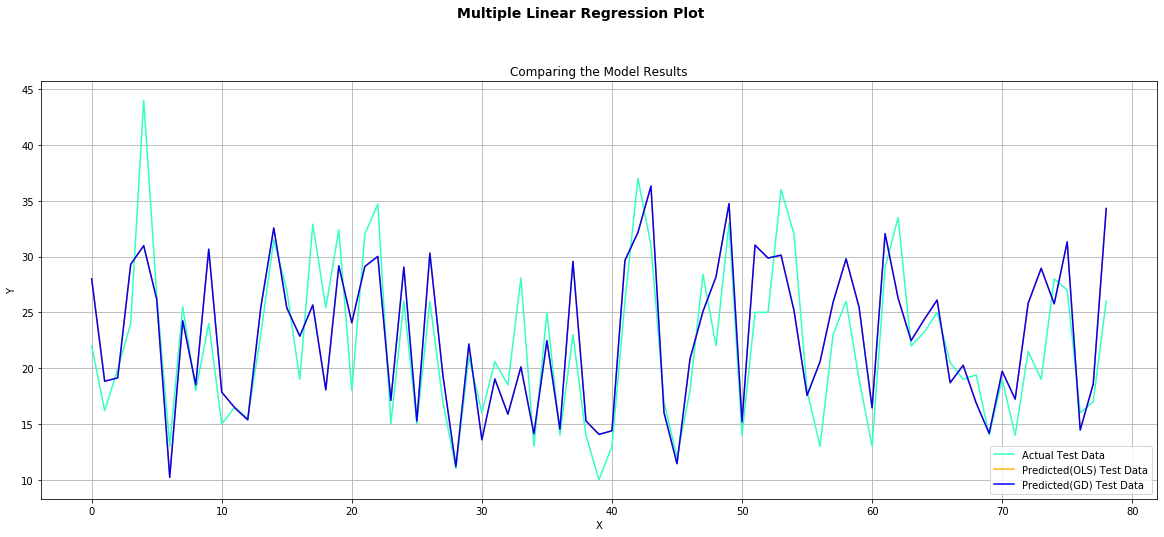

In [173]:
#Plotting all the datapoints

fig = plt.figure(figsize=(20,8))
fig.suptitle("Multiple Linear Regression Plot", fontsize=14, fontweight="bold")
ax = fig.add_subplot(111)
fig.subplots_adjust(top = 0.85)
ax.set_title("Comparing the Model Results")
ax.set_xlabel("X")
ax.set_ylabel("Y")
#ax.text(0, 500, "SSE : {} \nSST : {} \nR2   : {}".format(np.round(SSE,4),np.round( SST,4), np.round(R2,4)) , style = 'italic', bbox = {'facecolor': 'red', 'alpha': 0.5, 'pad': 10})
plt.grid(True)
plt.plot(y_test , color='#33FFC7',label = 'Actual Test Data')
plt.plot(yPredicted_test, color='#FFB10B', label = "Predicted(OLS) Test Data")
plt.plot(yPredicted_test3, color='b', label = "Predicted(GD) Test Data")
#plt.scatter(x_test, yPredicted_test, color='r', label = "Predicted Test Data")
#plt.scatter(xNew, yNew, color='b', label = "New Predicted Data")
#plt.plot(x_train, yPredicted, color = 'k', linewidth = 2, markersize = 12 , label = 'Regression Line using OLD')
#plt.plot(x_train, yPredicted2, color = 'r', linewidth = 2, markersize = 12 , label = 'Regression Line using Gradient Descent')
plt.legend(loc=4)
plt.show()